In [6]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 1
Due March 12, 2019.

For the midterm project, you will develop a Tolman-Oppenheimer-Volkov (TOV) solver to compute the hydrostatic structure of a relativistic neutron star. You will use this to determine the maximum masses of cold neutron stars (NSs) for several different equations of state (EOS).

Your code should adhere to the course Coding Standards.

  - Write a numerical solver for the spherically-symmetric TOV equations using a fourth-order Runge-Kutta integrator. Assume a polytropic EOS specified by $K$ and $\gamma$. You may find these notes particularly helpful.
  
\begin{align}
\frac{dm}{dr} &= 4\pi r^2 \rho \\
\frac{dP}{dr} &= -\frac{\rho m }{r^2}\left ( 1 + \frac{P}{\rho}\right ) \left( 1 + \frac{4\pi P^3}{m} \right ) \left ( 1 - \frac{2m}{r}\right ) ^{-1}\\
\frac{d\Phi}{dr} &= - \frac{1}{\rho} \frac{dP}{dr}\left( 1 + \frac{P}{\rho}\right ) ^{-1}
\end{align}

For a polytropic eos: $P = K \rho_0^\Gamma$, where $K$ is the polytropic gas constant and $n$ defined by $\Gamma \equiv 1 + 1/n$ is the polytropic index. We then have   $\rho = \rho_0 + P/(\Gamma -1 )$  and $\rho_0 \epsilon = P/(\Gamma -1 )$.
   
Below, constants are the corresponding barred ones.

In [8]:
from polytrope_star import PolytropeStar
import numpy as np
import matplotlib.pyplot as plt

/home/halvard/uio/PHY905_NumericalRelativity/project1/polytrope_star.py:25: RuntimeWarning: invalid value encountered in double_scalars
  return (P/self.K) ** (1/self._gamma)


2.4375144350725285e-31
7.807083010105192e-31
6.626073140304381e-31
5.55681772004342e-31
4.4693911015970774e-30
9.297197991787412e-31
1.2918647993780986e-30
2.652955717257455e-31
1.9723359166873597e-30
2.7617361023090995e-30
0.16151886459991324


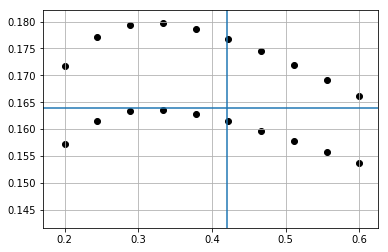

In [10]:
test_star = PolytropeStar(gamma = 2)
integrator = 'dopri5'

for rhoc_bar in np.linspace(0.2, 0.6, 10):
    test_star.set_initial_conditions(rhoc = rhoc_bar)
    solver =  test_star.solve_star_ivp(integrator = integrator)
    print(solver.y[1][-1])
    plt.scatter(rhoc_bar, solver.y[0][-1], c='k')
    plt.scatter(rhoc_bar, solver.y[3][-1], c='k')
solver = test_star.set_initial_conditions(rhoc = 0.420).solve_star_ivp(
                    integrator = integrator)
print(solver.y[0][-1])
plt.axvline(0.42)
plt.axhline(0.164)
plt.grid()

In [11]:
n = 4/7
gamma = 1+1/n
print(gamma)

K = 30000 # in c = G = M_sun = 1

2.75


  - Determine the maximum mass of a cold NS for $K=30000$ (in $G=c=M_\odot=1$ units) and $\gamma=2.75$.
  
First we calculate

In [23]:
gamma = 2.75
n = 1/(gamma - 1)

values = []

N = 200
for rhoc_bar in np.linspace(0.1, 1.8, N):
    test_star = PolytropeStar(gamma).set_initial_conditions(rhoc = rhoc_bar)
    solver = test_star.solve_star_ivp()

    r = solver.t
    M, P, Phi, M0 = solver.y
    values.append([r[-1], M[-1], P[-1], Phi[-1], M0[-1], rhoc_bar])
   

/home/halvard/uio/PHY905_NumericalRelativity/project1/polytrope_star.py:25: RuntimeWarning: invalid value encountered in double_scalars
  return (P/self.K) ** (1/self._gamma)


Then we plot 

<IPython.core.display.Math object>


Maximum values for K = 30000, \gamma = 2.75:
     M_bar = 0.128
     R     = 11.97  km
     M     = 2.434 M_sun   
     M_0   = 2.896 M_sun     
     rho_c = 1.395e+15 g/cc      



Text(0.5,0,'Central density [g/cc]')

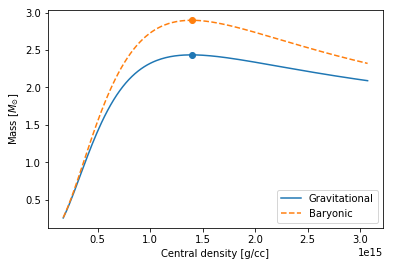

In [24]:
K     = 30000      # C = G = M_sun = 1
K_cgs = 1.98183e-6 # cgs
 
radius, grav_mass, pressure, _, mass, rhoc_bar = np.array(values).T
imax = np.argmax(grav_mass)

M_max_sun = grav_mass[imax] * K**(n/2)

length_conv  = 6.7706e-6
density_conv = 1.6199e-18
rhoc_cgs = rhoc_bar * K**(-n)/density_conv
r_km     = radius * K**(n/2)/length_conv * 1e-5

from IPython.display import display, Latex, Math
display(Math("Ax=b"))

disp_string = r"""
Maximum values for K = 30000, \gamma = 2.75:
     M_bar = {mbar:.3f}
     R     = {r:.4g}  km
     M     = {gm:.3f} M_sun   
     M_0   = {bm:.3f} M_sun     
     rho_c = {cd:.4g} g/cc      
""".format(mbar = grav_mass[imax], r =  r_km[imax],
           gm =  grav_mass[imax] * K**(n/2),
           bm =  mass[imax] * K**(n/2), 
           cd =  rhoc_cgs[imax])

print(disp_string)

plt.scatter(rhoc_cgs[imax], grav_mass[imax] * K**(n/2), c = 'C0')
plt.scatter(rhoc_cgs[imax], mass[imax]* K**(n/2), c = 'C1')

plt.plot(rhoc_cgs, grav_mass* K**(n/2), '-', label = 'Gravitational')
plt.plot(rhoc_cgs, mass* K**(n/2), '--', label = 'Baryonic')
plt.legend()
plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Central density [g/cc]')

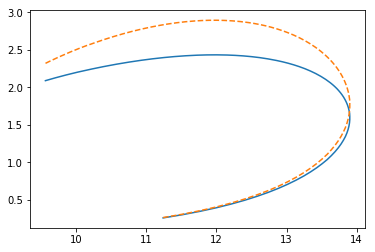

In [26]:
plt.plot(r_km, grav_mass* K**(n/2), '-', label = 'Gravitational')
plt.plot(r_km, mass* K**(n/2), '--', label = 'Baryonic')

 
  - Now, modify your code to use any arbitrary table-based EOS. Specifically, make your solver compatible with the EOS available on stellarcollapse.org. There is example code on that site in C++ and Fortran for reading and using the tables there, and working with the EOS tables is trivial in Python using h5py.
 

Loading the HShen, there are some weird things with the temperature ranges of this one

In [44]:
import h5py

test = 'HShen_HyperonEOS_rho220_temp180_ye65_version_1.1_20131007.h5'
ftest = h5py.File(test)
print(list(ftest.keys()))

print('log', get_bounds(ftest['logrho'][:]),   'g/cm^3')
print('log', get_bounds(ftest['logpress'][:]), 'MeV/fm^3')
print('log', get_bounds(ftest['ye'][:]))
ftest.close()

['Abar', 'Meff', 'Xa', 'Xh', 'Xn', 'Xp', 'Zbar', 'cs2', 'dedt', 'dpderho', 'dpdrhoe', 'energy_shift', 'entropy', 'gamma', 'logenergy', 'logpress', 'logrho', 'logtemp', 'mu_e', 'mu_n', 'mu_p', 'muhat', 'munu', 'pointsrho', 'pointstemp', 'pointsye', 'timestamp', 'ye']
log [3.0, 16.0] g/cm^3
log [18.573418605725163, 37.161923489191174] MeV/fm^3
log [0.01, 0.65]


In [8]:
def get_bounds(x):
    return [np.min(x), np.max(x)]

In [10]:
filename = 'Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5'

# Figuring out the units

### Testing speed of different integrators

In [18]:
import time
# rhoc = 3e15 * 1.6199e-18
for integrator in ["dop853","dopri5","vode","lsoda"]:
    start1 = time.time()
    print('initiating')
    test = TableStar(filename).set_initial_conditions(rhoc = 10**-3)
    start = time.time()
    print('solving with %s' % 10**-3, (start - start1))
    solver, r_values, values = test.solve_star_ode(Nr = 100, integrator = integrator)
    stop = time.time()
    print('time use: ', stop - start)

    plt.plot(r_values)#, solver.y[1])

initiating
solving with 0.001 0.8251006603240967


KeyboardInterrupt: 

# compare solver stability

In [67]:
test = TableStar(filename).set_initial_conditions(rhoc = 10**-3.2)

Nr_values = np.linspace(100, 200, 5, dtype = np.int64)
t_v = {}
y_v = {}
integrator = 'dopri5'
for integrator in ["dop853","dopri5","vode","lsoda"]:
    print(integrator)
    t_v[integrator] = []
    y_v[integrator] = []

    for Nr in Nr_values:
        print(Nr)
        solver, t1, y1 = test.solve_star_ode(Nr = Nr, integrator = integrator)
        t_v[integrator].append(t1[-1])
        y_v[integrator].append(y1[-1])

dop853
100


/home/halvard/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dop853: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


125
150
175
200
dopri5
100
125
150
175
200
vode
100


/home/halvard/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1009: UserWarning: vode: Repeated convergence failures. (Perhaps bad Jacobian supplied or wrong choice of MF or tolerances.)
  self.messages.get(istate, unexpected_istate_msg)))


125
150
175
200
lsoda
100
125
150
175
200


In [19]:
to_km = 1e-5/6.7706e-6

for integrator in ["dop853","dopri5","vode","lsoda"]:
    plt.plot(Nr_values, np.array(t_v[integrator]) * to_km, label = integrator)
plt.xlabel('Nr')
plt.ylabel('Radius [km]')
plt.legend()

NameError: name 'Nr_values' is not defined

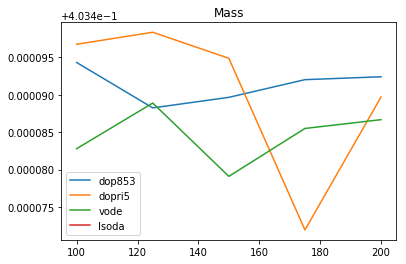

In [89]:
for integrator in ["dop853","dopri5","vode","lsoda"]:

    plt.plot(Nr_values, np.array(y_v[integrator])[:,0], label = integrator)
plt.title('Mass')
plt.legend()

# Test dopri5 for low values of Nr

10


/home/halvard/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))
/home/halvard/uio/PHY905_NumericalRelativity/project1/tov.py:158: UserWarning: Something went wrong in the integration, and we need a better error message
  warnings.warn('Something went wrong in the integration, and we need a better error message')


23
56
133
316


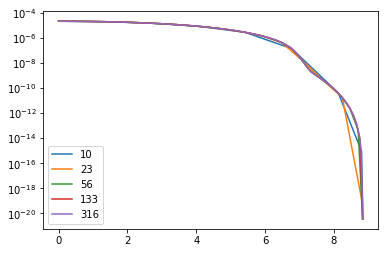

In [20]:
test = TableStar(filename).set_initial_conditions(rhoc = 10**-3.2)

Nr_values = np.logspace(1, 2.5, 5, dtype = np.int64)
t_dp5 = []
y_dp5 = []
integrator = 'dopri5'

for Nr in Nr_values:
    print(Nr)
    solver, t1, y1 = test.solve_star_ode(Nr = Nr, integrator = integrator)
    t_dp5.append(t1[-1])
    y_dp5.append(y1[-1])
    # rho = [test.rho(P) for P in y1[:,1]]
    # plt.semilogy(t1, rho)
    plt.semilogy(t1, y1[:,1], label = "{:.0f}".format(Nr))
plt.legend()

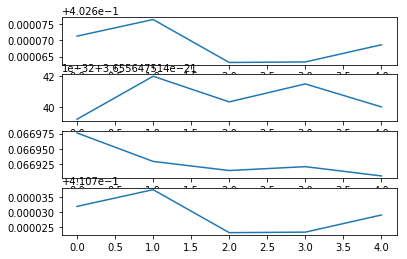

In [21]:
y_dp5 = np.array(y_dp5)
i = 0
np.std(y_dp5, axis=0)
fig, axes = plt.subplots(4)
for i in range(4):
    axes[i].plot(y_dp5[:,i])

### Seems like even a value of N = 10 works... 
Lets test this more thoroughly. First make a good standard of high values with $N$ in the 100-range, finding mass and radius averages and deviations

In [194]:
test = TableStar(filename).set_initial_conditions(rhoc = 10**-3.2)
integrator = 'dopri5'

good_y = []
good_t = []
for Nr in range(90,121,5):
    print(Nr)
    solver, t, y = test.solve_star_ode(Nr = Nr, integrator = integrator)
    
    good_t.append(t[-1])
    good_y.append(y[-1])
    
mean_r = np.mean(good_t)
mean_m = np.mean(np.array(good_y)[:,0])
mean_m

90
95
100
105
110
115
120


0.403498614904069

check at which N the deviation from the good value is more than a percent

In [208]:
for Nr in np.logspace(2, 0, 8, dtype=int):
    print(Nr)
    solver, t, y = test.solve_star_ode(Nr = Nr, integrator = integrator)
    print(len(t))
    
    diff = np.abs(y[-1, 0] - mean_m)/mean_m 
    print(diff, diff > 0.01)

100
28
4.665339383436971e-06 False
51
15
7.902255797879383e-07 False
26
10
1.1165105166174493e-05 False
13
5
3.1796032173160266e-05 False
7
3
2.466774839226729e-05 False
3
4
1.4931225590367916e-05 False
1
3
2.2211038641860895e-05 False
1
3
2.2211038641860895e-05 False


In [212]:
solver, t, y = test.solve_star_ode(Nr = 50, integrator = integrator)

3.3853e-07
0.67706033853
1.35412033853
2.03118033853
2.70824033853
3.38530033853
4.0623603385300004
4.73942033853
5.41648033853
6.09354033853
6.77060033853
7.44766033853
8.12472033853
8.801780338530001


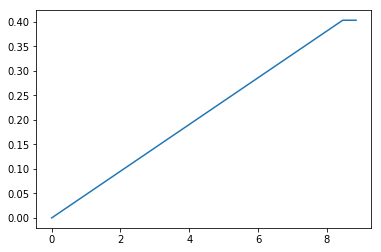

In [205]:
plt.plot(t, y[:,0])

In [201]:
diff

2.2211038641860895e-05

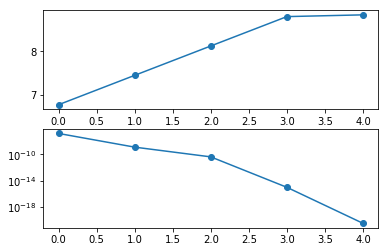

In [131]:

_, [ax1,ax2] = plt.subplots(2)
ax1.plot(t1[-5:], 'o-')
ax2.semilogy(y1[-5:,1], 'o-')

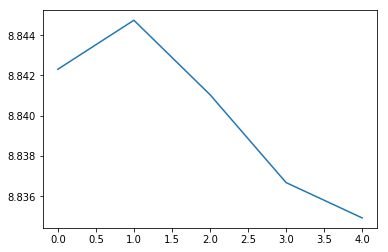

In [118]:
plt.plot(t_dp5)

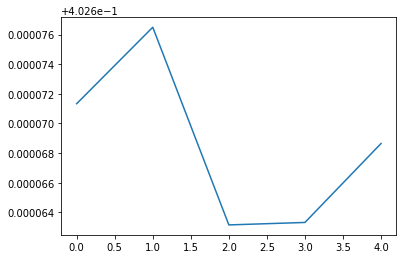

In [52]:
plt.plot(np.array(y_dp5)[:,0])

initiating
solving with 0.00501 0.7934191226959229
solving with 0.00490 0.7934191226959229
time use:  12.10019588470459


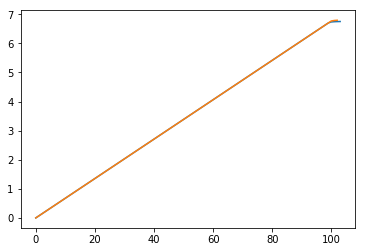

In [57]:
import time
Nr = 200
# r_max = 

start1 = time.time()
print('initiating')
rhoc = 10**-2.30
test = TableStar(filename).set_initial_conditions(rhoc = rhoc)
start = time.time()
print('solving with %.5f'%rhoc, start - start1)
solver, t1, y1 = test.solve_star_ode(Nr = 200, integrator = 'vode')

rhoc = 10**-2.31
print('solving with %.5f'%rhoc, start - start1)
test.set_initial_conditions(rhoc = rhoc)
solver, t2, y2 = test.solve_star_ode(Nr = 200, integrator = 'vode')
stop = time.time()
print('time use: ', stop - start)

plt.plot(t1)#, solver.y[1])
plt.plot(t2)#, solver.y[1])

### Edges looks like this

[35, 45, 6, 7.5]

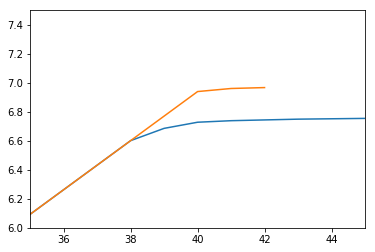

In [23]:
plt.plot(t1)#, solver.y[1])
plt.plot(t2)#, solver.y[1])
plt.axis([35,45,6,7.5])

In [22]:
# plt.semilogy(t1, y1[:, 1], label = 'pressure, $\rho_c = 10^-{2.3}$')
# plt.semilogy(t2, y2[:, 1], label = 'pressure, $\rho_c = 10^-{2.35}$')
# plt.axhline(10**test.pres_bounds[0], 'pressure lower bound')
# plt.legend()

(-15.570458338804938, -2.2904585388049377)
-3.4
-3.3
-3.1999999999999997
-3.0999999999999996
-3.0
-2.9


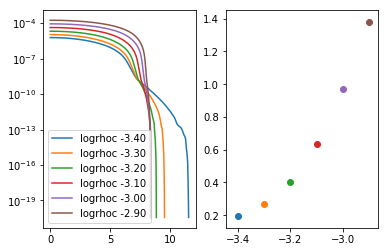

In [85]:
fig,[ax1,ax2] = plt.subplots(1,2)

final_values = []
integrator = 'vode'
Nr = 200


star = TableStar(filename)

print(test.rho_bounds)
#for logrhoc in np.linspace(-3.3, -2.2903, 30):
for logrhoc in np.linspace(-3.4, -2.9, 6):
    
    print(logrhoc)
    star.set_initial_conditions(rhoc = 10**logrhoc)
    solver, t, y = star.solve_star_ode(integrator = integrator, Nr = Nr)
    
    last_pos = -1 # Edge finding ensures last position at pressure < tol
    final_values.append([logrhoc, t[last_pos]] + list(y[last_pos]))
    
    ax1.semilogy(t, y[:, 1], label = 'logrhoc {:.2f}'.format(logrhoc))
    ax2.scatter(logrhoc, y[last_pos, 0])
ax1.legend()
# rhoc = 3e15 * 1.6199e-18
# test = TableStar(filename).set_initial_conditions(rhoc = rhoc)

In [ ]:
y2 = 

(-20.73203909100906, -2.068360655411844) (0.01, 0.6)


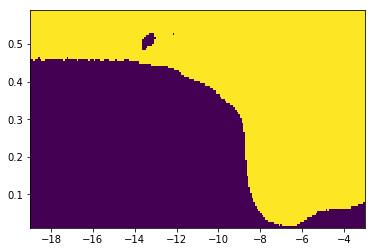

In [309]:
star.rho_interp
print(star.pres_bounds, star.ye_bounds)

x = np.linspace(-19, -3, 200)
y = np.linspace(0.011, 0.59, 100)
x,y = np.meshgrid(x,y)
z = star.munu_interp_pres(y,x)
plt.pcolormesh(x,y,z>0)

(-15.570458338804938, -2.2904585388049377)


Text(0,0.5,'ye')

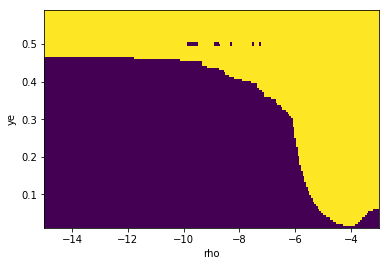

In [311]:
print(star.rho_bounds)

x2 = np.linspace(-15, -3, 200)
x2,y2 = np.meshgrid(x2,y)
z2 = star.munu_interp_rho(y2,x2)
plt.pcolormesh(x2,y2,z2>0)
plt.xlabel('rho')
plt.ylabel('ye')

In [280]:
import numpy as np
import h5py
from tov import TableStar, BaseStar
from scipy.interpolate import UnivariateSpline

class TestTable(TableStar):

    """Docstring for TestTable. """

    def __init__(self, tablefile, scaling = {}, *args, **kwargs):
        """Assumes cold star, i.e minimal T. 
        
        Scales to geometrized units c = G = M_sun = 1
        """
        BaseStar.__init__(self, *args, **kwargs)
        self._allow_negative_pressure = True

        f = h5py.File(tablefile, 'r')
        
        self.scaling = {}
        
        # default scaling is  c = G = M_sun = 1
        default_scaling = {'pres'  : 1.801569643420104e-39, # from dyn/cm^2
                           'rho'   : 1.6191700468788605e-18, # from g/cm^3
                           'specific_energy': 1.11265005605e-21,  # from erg/g
                           # munu should be MeV/baryon
                          }
        default_scaling.update(scaling)
        self.scaling.update(default_scaling)
        
        self.ye_arr   = f['ye'][:] 
        self.rho_arr  = f['logrho'][:] + np.log10(self.scaling['rho'])
        
        self.energy_shift  = f['energy_shift'][0] * self.scaling['specific_energy']

        rho_grid, ye_grid  = np.meshgrid(self.rho_arr, self.ye_arr)
        pres_values   = f['logpress'][:,0,:]  + np.log10(self.scaling['pres'])
        munu_values   = f['munu'][:,0,:]      # *          self.scaling['energy']
        energy_values = f['logenergy'][:,0,:] + np.log10(self.scaling['specific_energy']) 
        f.close()

        self.ye_bounds   = (np.min(self.ye_arr),  np.max(self.ye_arr))
        self.rho_bounds  = (np.min(self.rho_arr), np.max(self.rho_arr))
        self.pres_bounds = (np.min(pres_values),  np.max(pres_values))

        self.energy_arr = np.zeros_like(self.rho_arr)
        self.pres_arr   = np.zeros_like(self.rho_arr)

        prev_root = 0 
        
        # for each rho, extract the values given ye such that munu = 0
        for i, rho in enumerate(self.rho_arr):
            munu_func   = UnivariateSpline(self.ye_arr, munu_values[:,i],   s=0)
            pres_func   = UnivariateSpline(self.ye_arr, pres_values[:,i],   s=0)
            energy_func = UnivariateSpline(self.ye_arr, energy_values[:,i], s=0)
            
            ye_roots = munu_func.roots()
            
            
            if len(ye_roots) > 1:
                # in case several roots, we pick the closest one
                import warnings
                warnings.warn('Error, more than one root in munu! Using closest to previous')
                i_root = np.argmin(np.abs(np.array(ye_roots) - prev_root))
            else:
                i_root = 0
                
            ye_root = ye_roots[i_root]
            prev_root = ye_root
            
            self.pres_arr[i] = pres_func(ye_root)
            self.energy_arr[i] = energy_func(ye_root)
            
        self.rho_interp    = UnivariateSpline(self.pres_arr, self.rho_arr)
        self.pres_interp   = UnivariateSpline(self.rho_arr, self.pres_arr)
        self.energy_interp = UnivariateSpline(self.rho_arr, self.energy_arr)
#         fig,[ax1,ax2,ax3] = plt.subplots(3)
#         ax1.plot(self.pres_arr, self.rho_arr)
#         ax2.plot(self.rho_arr, self.pres_arr)
#         ax3.plot(self.rho_arr, self.energy_arr)
            
    def energy(self, rho):
        logrho = np.log10(rho)
        return 10**self.energy_interp(logrho) - self.energy_shift
    
    def P(self, rho):
        # a, b = self.ye_bounds
        logrho = np.log10(rho)
        # res = scipy.optimize.bisect(self.munu, a = a, b = b, args=(logrho, 'rho'))
        # self.current_ye = res
        if P < self.
        return 10**self.pres_interp(logrho)
    
    def rho(self, P):
        # a, b = self.ye_bounds
        logP = np.log10(P)
        # res = scipy.optimize.bisect(self.munu, a = a, b = b,  args=(logP, 'pres'))
        # self.current_ye = res
        return 10**self.rho_interp(logP)
    
    def rho0(self, P, rho = None):
        """Uses P as is, no convert to log"""
        rho = rho or self.rho(P)
        eps = self.energy(rho)
        return rho / (1 + eps)


In [304]:
final_values = []
integrator = 'vode'
Nr = 200

from test_table import TestTable
test = TestTable('test/' + filename)

/home/halvard/uio/PHY905_NumericalRelativity/project1/test_table.py:63: UserWarning: Error, more than one root in munu! Using closest to previous
  warnings.warn('Error, more than one root in munu! Using closest to previous')


(-15.570458338804938, -2.2904585388049377)
96


/home/halvard/uio/PHY905_NumericalRelativity/project1/test_table.py:128: RuntimeWarning: invalid value encountered in log10


98
104
112
105
114
123
124
125
123
130
128
133
130
133
132
133
131
144
142


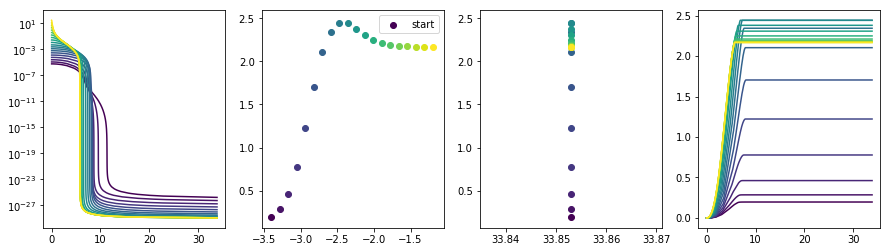

In [306]:
fig,[ax1,ax2,ax3,ax4] = plt.subplots(1,4, figsize = [15,4])

print(test.rho_bounds)
#for logrhoc in np.linspace(-3.3, -2.2903, 30):

a = -3.4
b = -1.2
integrator = 'dopri5'
for logrhoc in np.linspace(a, b, 20):
    # print(logrhoc)
    test.set_initial_conditions(rhoc = 10**logrhoc)
    # solver, t, y = test.solve_star_ode(integrator = integrator, Nr = Nr)
    solver= test.solve_star_ivp(integrator = integrator)# , Nr = Nr)
    t = solver.t
    y = solver.y.T
    
    last_pos = -1 # Edge finding ensures last position at pressure < tol
    final_values.append([logrhoc, t[last_pos]] + list(y[last_pos]))
    
    c = plt.cm.viridis((logrhoc-a) / (b - a))
    print(len(t))
    ax1.semilogy(t, y[:, 1], label = 'logrhoc {:.2f}'.format(logrhoc), color = c)
    ax2.scatter(logrhoc, y[last_pos, 0], c = c)
    ax3.scatter(t[last_pos], y[last_pos, 0], c = c)
    ax4.plot(t, y[:, 0], c = c)
    
ax2.legend(['start'])
# rhoc = 3e15 * 1.6199e-18
# test = TableStar(filename).set_initial_conditions(rhoc = rhoc)

In [271]:
rho, r_values, m_values, P_values, phi_values, M0_values = np.array(final_values).T
print(star.r_max/100)

0.135412


In [272]:
7.5*to_km

11.077304817889111

Text(0,0.5,'Mass [$M_\\odot$]')

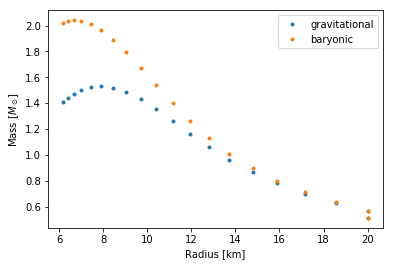

In [273]:
to_km = 1e-5/6.7706e-6

plt.plot(to_km*r_values, m_values, '.', label = 'gravitational')
plt.plot(to_km*r_values, M0_values, '.', label = 'baryonic')
plt.legend()
plt.xlabel('Radius [km]')
plt.ylabel(r'Mass [$M_\odot$]')

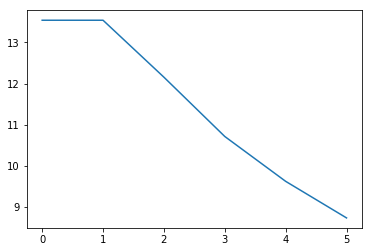

In [81]:
plt.plot(r_values)

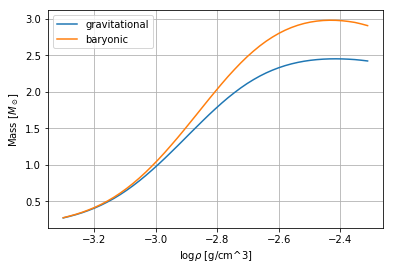

In [43]:
plt.plot(rho, m_values, label = 'gravitational')
plt.plot(rho, M0_values, label = 'baryonic')
plt.legend()
plt.xlabel(r'$\log \rho$ [g/cm^3]')
plt.ylabel(r'Mass [$M_\odot$]')
plt.grid()

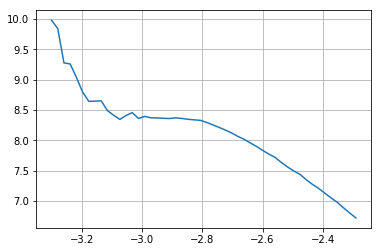

In [43]:
plt.plot(rho, r_values)
plt.grid()

In [ ]:
np.log10(3e15 * 1.6199e-18)

In [ ]:
rho_arr = test.rho_arr
np.min(rho_arr)

In [ ]:
a, b  = test.ye_bounds
print(test.pres_bounds)
print(test.rho_bounds)
test.pres_interp(a, -15), test.pres_interp(b, -13)

In [ ]:
test.ye_bounds

In [ ]:
def f(x):
    return -x
from scipy.integrate import ode 

solver = ode(f)

 
prev_t = 0
prev_y = 1
solver.set_initial_value(prev_y,prev_t)
dx = 0.1
for i in range(20):
    if i == 10:
        solver.set_initial_value(prev_y, 0)
        print(solver.y, prev_y)
        
    plt.scatter(solver.t, solver.y, c ='k')
        
    solver.integrate(solver.t + dx)
    prev_t = solver.t
    prev_y = solver.y

In [ ]:
dir(solver)

In [ ]:

test.P(test.rhoc)
[(test.P(v),v) for v in np.logspace(-10,1,11)]

In [ ]:
test.solve_star()

In [ ]:
T_arr = np.array(f['logtemp'])
ye_arr = np.array(f['ye'])
rho_arr = np.array(f['logrho'])

rho_grid, ye_grid = np.meshgrid(rho_arr, ye_arr)
pres_values = f['logpress'][:,0,:]
munu_values = f['munu'][:,0,:]


ye_pres_points = np.column_stack([ye_grid.ravel(), pres_values.ravel()]),
ye_rho_points  = np.column_stack([ye_grid.ravel(), rho_grid.ravel()]),

rho_interp  = LinearNDInterpolator(ye_pres_points, rho_grid.ravel())
pres_interp = LinearNDInterpolator(ye_rho_points, pres_values.ravel())
munu_interp = LinearNDInterpolator(ye_rho_points, munu_values.ravel())

In [ ]:
func3 = lambda ye, P : munu_interp([ye, P])
ye_bounds = [np.min(ye_arr), np.max(ye_arr)]
res = optimize.root_scalar(func3, method = 'brentq', args=(P), bracket = ye_bounds)
res

In [ ]:
? optimize.fsolve

In [ ]:
rho_interp = interp2d(ye_grid, pres_values, rho_grid)

pres_interp = interp2d(ye_grid, rho_grid, pres_values)

In [ ]:
# rho_interp(0.4, 20)
pres_interp([0.4, 0.7], [4, 5])

In [ ]:
?pres_interp

In [ ]:
a = pres_interp(ye_grid.ravel(), pres_values.ravel())

In [ ]:
np.isclose(a, pres_values)

In [ ]:
rho_interp(0.4, 20)

In [ ]:
%timeit rho_interp(0.4, 20)

In [ ]:
rho_shaped = rho_values.reshape(pres_grid.shape)

In [ ]:
valid_cols = ~np.any(np.isnan(rho_values.reshape(pres_grid.shape)), axis = 0)
rho_valid = rho_shaped[:,valid_cols]

plt.imshow(rho_shaped[:,valid_cols])

In [ ]:
grid_reshaped = grid.reshape(list(pres_grid.shape)+[-1])
plt.pcolormesh(grid_reshaped[:,:,0], grid_reshaped[:,:,1], rho_shaped)

In [ ]:
grid_valid = grid_reshaped[:,valid_cols]
m = plt.pcolormesh(grid_valid[:,:,0], grid_valid[:,:,1], rho_valid)
plt.colorbar(m)

In [ ]:
grid_valid = grid_reshaped[:,valid_cols]

In [ ]:
grid_valid.shape, rho_valid.shape

In [ ]:
sdalsadj

In [ ]:
? interp2d

In [ ]:
rho_interp = interp2d(grid_reshaped[:,valid_cols,0].ravel(), 
                           grid_reshaped[:,valid_cols,1].ravel(), 
                           rho_valid.ravel())

In [ ]:
grid.shape
np.any(np.isnan(rho_values))

In [ ]:
pressure_interp(grid.T[0], grid.T[1])

In [ ]:
Nrho, Ntemp, Nye, pres_values.shape

In [ ]:
m = plt.scatter(ye_grid.ravel(), rho_grid.ravel(), c = pres_values.ravel())
plt.colorbar(m)

In [ ]:
m = plt.scatter(grid.T[0], grid.T[1], marker='.', c = rho_values)
plt.colorbar(m)

In [ ]:
from scipy.interpolate import griddata

pressure_grid = np.linspace(np.min(a), np.max(a), N)
P,_b = np.meshgrid(pressure_grid, b)

print(P.shape)
points = np.array([A.ravel(), c.ravel()]).T
values = B.ravel()
xi = np.array([A.ravel(), c.ravel()]).T

print(B.size, c.size, A.size)
print(points.shape)

gd = griddata(points, values, xi) 
plt.pcolormesh(points[:,0], points[:,1], gd)

In [ ]:
np.concatenate([A.ravel(),B.ravel()])

In [ ]:
np.array(f['logrho'])

 
  - Determine the maximum mass for any five of the EOS available on stellarcollapse.org.
 

 
  - Make mass vs. radius plots for these same five EOS.